# Matplotlib basics

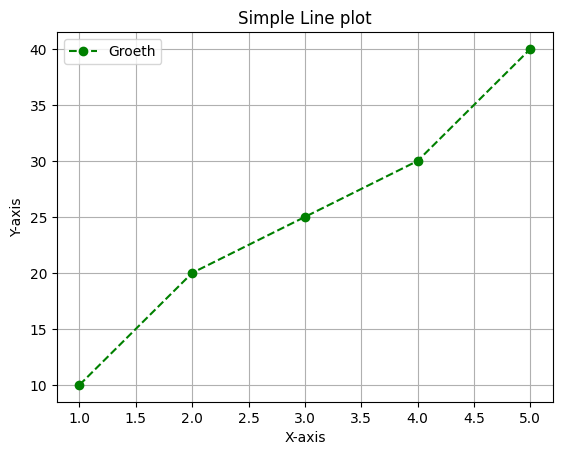

In [ ]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5]
y=[10,20,25,30,40]

plt.plot(x,y,label='Groeth',color='green',linestyle='--',marker='o')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Line plot')
plt.grid(True)
plt.legend()
plt.show() 

## Task: Analyzing Sales Data with Pandas & NumPy

### Dataset Creation:
	1.	Generate a random sales dataset using NumPy for a company with 500 transactions.
	2.	The dataset should have the following columns:
	•	Transaction_ID: Unique ID for each transaction (1 to 500).
	•	Date: Random dates in 2024 (between Jan 1 - Dec 31).
	•	Product: Randomly assign one of these five products - "Laptop", "Smartphone", "Tablet", "Headphones", "Smartwatch".
	•	Quantity: Random values between 1 to 5.
	•	Price_per_unit: Random float values (e.g., between $50 to $2000).
	•	Total_Amount: Quantity * Price_per_unit.

### Analysis Tasks:
	1.	Top 3 Best-Selling Products: Find the top 3 products by total quantity sold.
	2.	Revenue by Month: Compute the total revenue per month for 2024.
	3.	Find Outliers: Use NumPy to detect transactions where the Total_Amount is greater than 1.5 times the interquartile range (IQR) above Q3.
	4.	Pivot Table: Create a pivot table showing the Total_Amount by Product and Month.
	5.	Rolling Average: Compute a 7-day rolling average of total sales.

In [12]:
import pandas as pd
import numpy as np

np.random.seed(11)
num_transaction=500

transaction_id=np.arange(1,num_transaction+1)

date_range=pd.date_range(start='2020-04-01',end='2025-04-01')
dates=np.random.choice(date_range,size=num_transaction)

products=["Laptop","Smartphone","Tablet","Headphones","Smartwatch"]
product_choice=np.random.choice(products,size=num_transaction)

quantities=np.random.randint(1,6,size=num_transaction)

prices=np.round(np.random.uniform(50,2000,size=num_transaction),2)

total_amount=np.round(quantities*prices,2)

df=pd.DataFrame({
    "Transaction_ID":transaction_id,
    "Date":dates,
    "Product":product_choice,
    "Quantity":quantities,
    "Price_per_unit":prices,
    "Total_amount":total_amount
})


df["Date"]=pd.to_datetime(df["Date"])


#analysis task

top_products=df.groupby("Product")["Quantity"].sum().sort_values(ascending=False).head(3)
print("Top 3 Best-Selling Products:")
print(top_products)

#Revenue by month

df["Month"]=df["Date"].dt.month
monthly_revenue=df.groupby("Month")["Total_amount"].sum()
print("\nRevenue by Month:")
print(monthly_revenue)


#Finding Outliers using IQR

Q1=np.percentile(df["Total_amount"],25)
Q3=np.percentile(df["Total_amount"],75)
IQR=Q3-Q1
threshold=Q3+1.5*IQR

outliers=df[df["Total_amount"]>threshold]
print(f"\n Number os outliers: {len(outliers)}")


#pivot table
pivot=pd.pivot_table(df,values="Total_amount",index="Product",columns="Month",aggfunc="sum",fill_value=0)
print("\n Pivot table - Total_amount by Product and Month:")
print(pivot)

# 7 day rolling average of Total sales
df_sorted=df.sort_values("Date")
daily_sales=df_sorted.groupby("Date")["Total_amount"].sum().reset_index()
daily_sales["7_day_average"]=daily_sales["Total_amount"].rolling(window=7).mean()

print("\n7-Day Rolling Average (last 10 entries):")
print(daily_sales.tail(10))



Top 3 Best-Selling Products:
Product
Tablet        327
Headphones    324
Laptop        320
Name: Quantity, dtype: int32

Revenue by Month:
Month
1      94514.92
2     121688.09
3     162980.96
4     139231.60
5      84398.29
6     118535.48
7     123436.85
8     127391.04
9     162170.74
10    110143.59
11    169405.06
12    113929.51
Name: Total_amount, dtype: float64

 Number os outliers: 9

 Pivot table - Total_amount by Product and Month:
Month             1         2         3         4         5         6   \
Product                                                                  
Headphones  31376.57  18832.85  33499.11  40379.97  20235.47  35127.47   
Laptop      22130.19  29012.28  19911.00  16982.66  17231.55  31612.83   
Smartphone   3161.00  22737.38  27156.98  11642.35  23798.54  17437.24   
Smartwatch  15506.00  14142.03  39054.94  31001.45  11340.53  15170.14   
Tablet      22341.16  36963.55  43358.93  39225.17  11792.20  19187.80   

Month             7         8     

## Task: Analyzing and Visualizing a Randomly Generated Dataset

Objective:

### Create a random dataset using NumPy, analyze it using Pandas, and visualize key insights using Matplotlib.

##### Steps:
	1.	Generate a dataset using NumPy:
	•	Create an array of 500 random values (normally distributed, mean=50, std=15) for “Product Price.”
	•	Create an array of 500 random integers (1 to 10) for “Customer Ratings.”
	•	Generate random category labels ("Electronics", "Clothing", "Home").
	•	Store the data in a Pandas DataFrame.
	2.	Perform basic analysis using Pandas:
	•	Display summary statistics. 
	•	Find the average price for each category.
	•	Count the number of ratings per category.
	3.	Visualize the data using Matplotlib:
	•	Create a histogram of product prices.
	•	Create a bar chart of the average price per category.
	•	Create a scatter plot showing price vs. customer ratings.

##### Expected Output:
	•	A dataset stored in a Pandas DataFrame.
	•	Summary statistics.
	•	Three plots (histogram, bar chart, scatter plot).

Summary statistics
       product_price  customer_ratings
count     500.000000        500.000000
mean       50.222880          5.308000
std        14.684235          2.854722
min         2.150000          1.000000
25%        39.300000          3.000000
50%        50.080000          5.000000
75%        61.220000          8.000000
max        82.890000         10.000000

 Average price per category
category
Clothing       50.704875
Electronics    51.297048
Home           48.754885
Name: product_price, dtype: float64

 Number of ratings per category
category
Clothing       160
Electronics    166
Home           174
Name: customer_ratings, dtype: int64


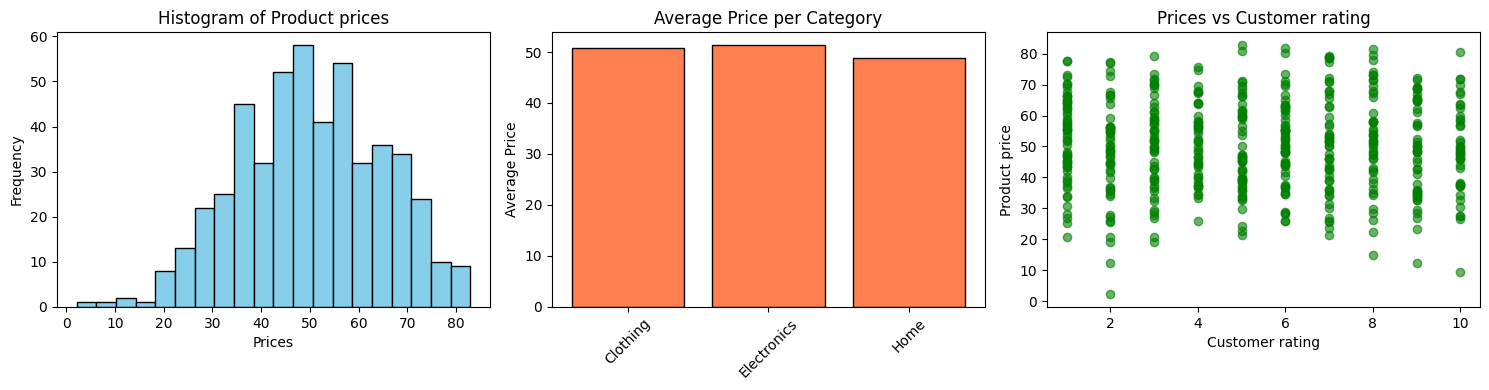

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(20)
product_prices=np.random.normal(loc=50,scale=15,size=500)
customer_ratings=np.random.randint(1,11,size=500)
categories=np.random.choice(["Electronics","Clothing","Home"],size=500)

df=pd.DataFrame(
    {
        'product_price':np.round(product_prices,2),
        'customer_ratings':customer_ratings,
        'category':categories
    }
)


print("Summary statistics")
print(df.describe())

avg_price_category=df.groupby("category")["product_price"].mean()
print("\n Average price per category")
print(avg_price_category)

ratings_count=df.groupby("category")["customer_ratings"].count()
print("\n Number of ratings per category")
print(ratings_count)


#visualization

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.hist(df["product_price"],bins=20,color='skyblue',edgecolor='black')
plt.title("Histogram of Product prices")
plt.xlabel('Prices')
plt.ylabel('Frequency')


plt.subplot(1,3,2)
categories = avg_price_category.index
avg_prices = avg_price_category.values
# avg_price_per_category.plot(kind='bar', color='coral', edgecolor='black')
plt.bar(categories, avg_prices, color='coral', edgecolor='black')
plt.title('Average Price per Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)


plt.subplot(1,3,3)
plt.scatter(df["customer_ratings"],df["product_price"],alpha=0.6,color='green')
plt.title("Prices vs Customer rating")
plt.xlabel('Customer rating')
plt.ylabel('Product price')

plt.tight_layout()
plt.show()




### Objectives:
1. Load the dataset and parse order_date as a datetime column.
2. Add a new column: total_price = quantity * price_per_unit
3. Extract month and year from order_date into a new column month_year.
4. Group by product_name and month_year, and calculate total revenue per product per month.
5. Identify top 5 products by total revenue (overall, not per month).
6. Plot a line chart showing the monthly revenue trends for the top 5 products.

   order_id  product_id       product_name  quantity  price_per_unit  \
0      1000         107  Smartphone Tripod         1           69.62   
1      1001         104     Wireless Mouse         3           59.82   
2      1002         108     Wireless Mouse         4          107.05   
3      1003         105          USB-C Hub         4           58.84   
4      1004         107  Smartphone Tripod         3           63.50   

  order_date  total_price  
0 2023-03-16        69.62  
1 2023-01-17       179.46  
2 2023-01-03       428.20  
3 2023-02-20       235.36  
4 2023-01-15       190.50  
   order_id  product_id       product_name  quantity  price_per_unit  \
0      1000         107  Smartphone Tripod         1           69.62   
1      1001         104     Wireless Mouse         3           59.82   
2      1002         108     Wireless Mouse         4          107.05   
3      1003         105          USB-C Hub         4           58.84   
4      1004         107  Smartphone Tri

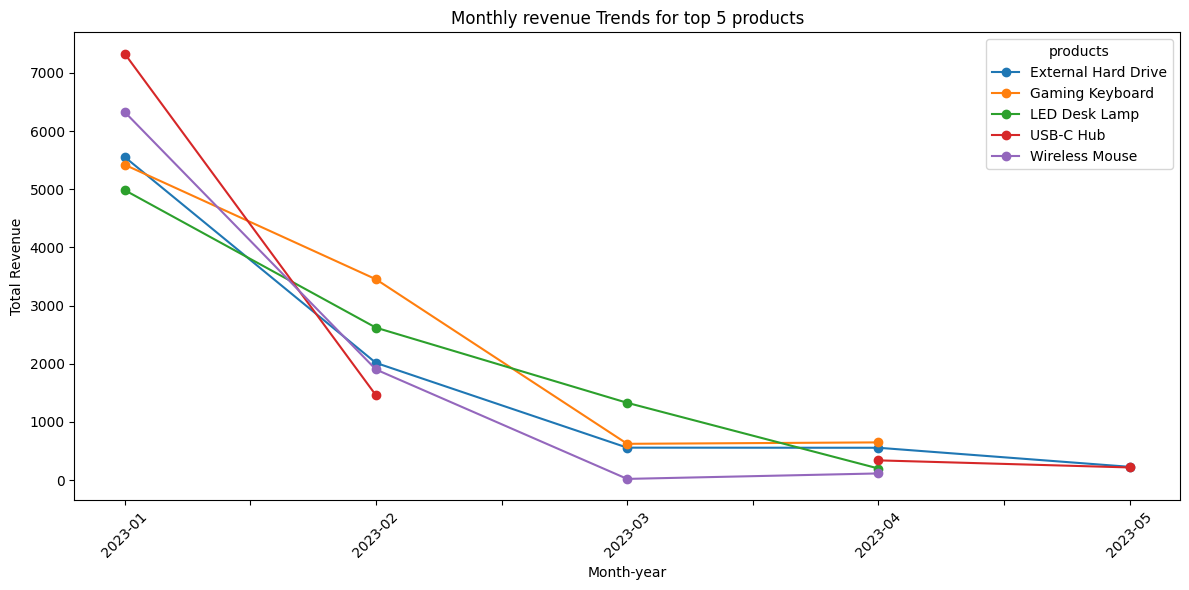

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("sales_data.csv",parse_dates=["order_date"])

df["total_price"]=df["quantity"]*df["price_per_unit"]
print(df.head(5))

df["month_year"]=df["order_date"].dt.to_period("M").astype(str)
print(df.head(5))

monthly_revenue=df.groupby(["product_name","month_year"])["total_price"].sum().reset_index()
print(df.head(5))

top_products=df.groupby("product_name")["total_price"].sum().nlargest(5).index
print(df.head(5))

top_monthly_revenue=monthly_revenue[monthly_revenue["product_name"].isin(top_products)]
pivot_df=top_monthly_revenue.pivot(index="month_year",columns="product_name",values="total_price")
print(pivot_df.head(5))

#plot
pivot_df.plot(figsize=(12,6),marker="o")
plt.title("Monthly revenue Trends for top 5 products")
plt.xlabel("Month-year")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.legend(title="products")
plt.tight_layout()
plt.show()

1. Simulate Sales Data using NumPy:
   - Create arrays for 100 sales transactions:
     - product_ids: Random integers from 1001 to 1010
     - quantities: Random integers between 1 and 5
     - prices: Random floats between 10 and 100 (rounded to 2 decimals)
     - dates: 100 random dates between Jan 1 and Jan 10, 2025

2. Create a DataFrame using Pandas:
   - Combine the arrays into a DataFrame called sales_df with columns:
     - ProductID, Quantity, Price, Date

3. Add Total Sale Column:
   - Create a new column: TotalSale = Quantity * Price

4. Introduce Missing Data:
   - Randomly set 5 Price values to NaN
   - Fill missing prices with the mean price

5. Group and Aggregate:
   - Group by ProductID and calculate:
     - Total quantity sold
     - Total revenue

6. Visualize using Matplotlib:
   - Bar chart: Total revenue per ProductID
   - Histogram: Distribution of TotalSale values
   - (Bonus) Subplot: One subplot with the bar chart, another with the histogram

C:\Users\USER\AppData\Local\Temp\ipykernel_12644\2839587000.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df["Price"].fillna(sales_df["Price"].mean(),inplace=True)


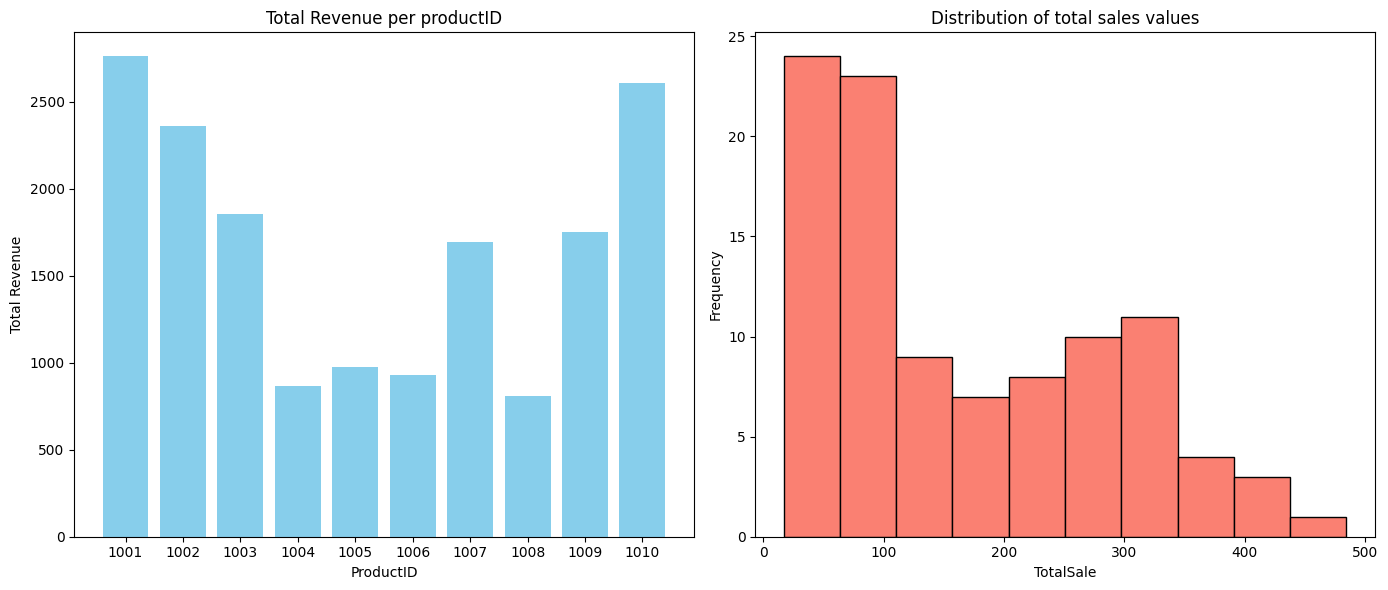

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10)
product_ids=np.random.randint(1001,1011,100)
quantities=np.random.randint(1,6,100)
prices=np.round(np.random.uniform(10,100,100),2)
dates=pd.to_datetime(np.random.choice(pd.date_range("2025-01-01", "2025-01-10"),100))


sales_df=pd.DataFrame({
    "ProductID":product_ids,
    "Quantity":quantities,
    "Price":prices,
    "Date":dates
})

sales_df["TotalSale"]=sales_df["Quantity"]*sales_df["Price"]

missing_indices=np.random.choice(sales_df.index,5,replace=5)
sales_df.loc[missing_indices,prices]=np.nan
sales_df["Price"].fillna(sales_df["Price"].mean(),inplace=True)
sales_df["TotalSale"]=sales_df["Quantity"]*sales_df["Price"]

grouped=sales_df.groupby("ProductID").agg(
    TotalQuantitySold=("Quantity","sum"),
    TotalRevenue=("TotalSale","sum")  
).reset_index()


fig,axs=plt.subplots(1,2,figsize=(14,6))


axs[0].bar(grouped["ProductID"].astype(str),grouped["TotalRevenue"],color="skyblue")
axs[0].set_title("Total Revenue per productID")
axs[0].set_xlabel("ProductID")
axs[0].set_ylabel("Total Revenue")


axs[1].hist(sales_df["TotalSale"],bins=10,color='salmon',edgecolor='black')
axs[1].set_title("Distribution of total sales values")
axs[1].set_xlabel("TotalSale")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()








### Linear Regression

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
import numpy as np 

data=load_iris()
X=data.data
y=data.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))


0.21078966924644768
0.06980803883276658
0.26421210954982094
0.8945851762592452


### Logistic regression

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

data=load_breast_cancer()
X=data.data
y=data.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

scalar=StandardScaler()
X_train_scalar=scalar.fit_transform(X_train)
X_test_scalar=scalar.transform(X_test)

model=LogisticRegression()
model.fit(X_train_scalar,y_train)

y_pred=model.predict(X_test_scalar)


print('Accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('F1-score:',f1_score(y_test,y_pred))

Accuracy: 0.9824561403508771
precision: 0.9868421052631579
recall: 0.9868421052631579
F1-score: 0.9868421052631579


### Decision tree  classifier

In [7]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

data=load_wine()
X=data.data
y=data.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred,average='weighted'))
print('recall:',recall_score(y_test,y_pred,average='weighted'))
print('F1-score:',f1_score(y_test,y_pred,average='weighted'))


accuracy: 0.9444444444444444
precision: 0.9462962962962962
recall: 0.9444444444444444
F1-score: 0.9439974457215836


### Random Forest

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

data=load_breast_cancer()
X=data.data
y=data.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred,average='macro'))
print('recall:',recall_score(y_test,y_pred,average='macro'))
print('f1:',f1_score(y_test,y_pred,average='macro'))

accuracy: 0.9649122807017544
precision: 0.9672569328433009
recall: 0.9580740255486406
f1: 0.9623015873015872


### SVM

In [10]:
from sklearn.svm import SVC

data=load_wine()
X=data.data
y=data.target

model=SVC()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.9473684210526315
Precision: 0.9514695830485304
Recall: 0.9473684210526315
F1-score: 0.9464615931721194


### K-nearest neighbours

In [11]:
from sklearn.neighbors import KNeighborsClassifier

data=load_wine()
X=data.data
y=data.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=SVC()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.8055555555555556
Precision: 0.801058201058201
Recall: 0.8055555555555556
F1-score: 0.80242656449553


### Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

data=load_wine()
X=data.data
y=data.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


### K-means clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data=load_wine()
X=data.data

model=KMeans(n_clusters=3,random_state=42)
model.fit(X)

print('silhouette score:',silhouette_score(X,model.labels_))

silhouette score: 0.5595823478987213


c:\ProgramData\anaconda3\envs\exassaro\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Hierarchial clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

data=load_wine()
X=data.data

model=AgglomerativeClustering(n_clusters=3)
model.fit(X)

print('silhouette_score:',silhouette_score(X,model.labels_))